## **Challenge:** <i><font color="red">Challenge description</font></i>

### Content:
* Dataset itroduction
* Assumptions
* Questions
* Exploratory Data Analysis
* Dealing with class imbalance
* Training and testing of various models performance
* Comclusions



____________________
## Dataset introduction

The data is originally from a [url description](https://www.kaggle.com/mlg-ulb/creditcardfraud).
Downloaded from [here](https://drive.google.com/file/d/1FCQY1SiWIjh_ME6Wtb3FG8Y1sKoRwAUc/view?usp=sharing). 

<i><font color="red"></font></i><i><font color="red">Introduction</font></i>

____________________
## Assumptions

Asssumptions

____________________
## Questions

Questions

## Exploratory Data Analysis

In [27]:
#Importing required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In this challenge, we will try to predict credit card fraud.

Download the data from [here](https://drive.google.com/file/d/1FCQY1SiWIjh_ME6Wtb3FG8Y1sKoRwAUc/view?usp=sharing). The data is originally from a [Kaggle Competition](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [28]:
import psycopg2
from psycopg2 import Error

try:
    # Connect to an existing database
    connection = psycopg2.connect(user="lhl_student",
                                  password="lhl_student",
                                  host="mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com",
                                  port="5432",
                                  database="mid_term_project")

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    print("PostgreSQL server information")
    print(connection.get_dsn_parameters(), "\n")
    # Executing a SQL query
    cursor.execute("SELECT * from flights limit 100")
    #list_tables = cursor.fetchall()
    #print(list_tables)
    
    # Fetch result
    #list_tables = cursor.fetchall()
    #print(list_tables)
    #record = cursor.fetchnone()
    #print("You are connected to - ", record, "\n")

except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
finally:
    if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL server information
{'user': 'lhl_student', 'channel_binding': 'prefer', 'dbname': 'mid_term_project', 'host': 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'prefer', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

PostgreSQL connection is closed


In [29]:
def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df
    df.head()

In [30]:
#SELECT * FROM flights order by random() limit 10000

In [56]:
df1 = pd.read_csv(r'flights.csv')
df1['fl_date'] = pd.to_datetime(df1['fl_date'])
df1['year'] = df1['fl_date'].dt.year
df1['month'] = df1['fl_date'].dt.month
df1.describe()

,Unnamed: 0,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,year,month
count,1.592748e+07,1.592748e+07,1.592748e+07,1.592748e+07,1.592748e+07,1.592748e+07,1.566867e+07,1.566373e+07,1.565421e+07,1.565422e+07,1.564632e+07,1.564631e+07,1.592748e+07,1.565241e+07,1.561574e+07,1.592748e+07,1.592748e+07,1.592746e+07,1.561833e+07,1.561226e+07,15927485.0,1.592748e+07,3.009484e+06,3.009484e+06,3.009484e+06,3.009484e+06,3.009484e+06,108938.000000,108933.000000,108936.000000,0.0,1.592748e+07,1.592748e+07
mean,1.023687e+06,2.734882e+03,2.734848e+03,1.267961e+04,1.267959e+04,1.329794e+03,1.334325e+03,1.054971e+01,1.753314e+01,1.358683e+03,1.459648e+03,7.685950e+00,1.484700e+03,1.464147e+03,5.475932e+00,1.690210e-02,2.507552e-03,1.378777e+02,1.331064e+02,1.079393e+02,1.0,7.679726e+02,2.037512e+01,3.674443e+00,1.623685e+01,8.853279e-02,2.729212e+01,1337.352742,40.022656,39.358642,NaN,2.018508e+03,6.576734e+00
std,7.426129e+05,1.862390e+03,1.862470e+03,1.522462e+03,1.522461e+03,4.897481e+02,5.035764e+02,4.780636e+01,1.005476e+01,5.050375e+02,5.326496e+02,6.144411e+00,5.167260e+02,5.369108e+02,4.987401e+01,1.289047e-01,5.001264e-02,7.164592e+01,7.161359e+01,6.967538e+01,0.0,5.858934e+02,6.320810e+01,3.111776e+01,3.775392e+01,3.135871e+00,5.334582e+01,502.346789,35.012949,33.735253,NaN,4.999355e-01,3.396287e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,1.013500e+04,1.013500e+04,1.000000e+00,1.000000e+00,-1.280000e+03,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.290000e+03,0.000000e+00,0.000000e+00,-1.430000e+02,-1.228000e+03,-1.384000e+03,1.0,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000,NaN,2.018000e+03,1.000000e+00
25%,3.918920e+05,1.126000e+03,1.126000e+03,1.129200e+04,1.129200e+04,9.150000e+02,9.170000e+02,-6.000000e+00,1.100000e+01,9.330000e+02,1.044000e+03,4.000000e+00,1.100000e+03,1.048000e+03,-1.500000e+01,0.000000e+00,0.000000e+00,8.700000e+01,8.200000e+01,5.800000e+01,1.0,3.380000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,901.000000,17.000000,17.000000,NaN,2.018000e+03,4.000000e+00
50%,8.874640e+05,2.317000e+03,2.317000e+03,1.288900e+04,1.288900e+04,1.321000e+03,1.327000e+03,-2.000000e+00,1.500000e+01,1.341000e+03,1.459000e+03,6.000000e+00,1.513000e+03,1.503000e+03,-6.000000e+00,0.000000e+00,0.000000e+00,1.190000e+02,1.150000e+02,8.900000e+01,1.0,6.030000e+02,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,1351.000000,29.000000,29.000000,NaN,2.019000e+03,7.000000e+00
75%,1.538805e+06,4.324000e+03,4.324000e+03,1.405700e+04,1.405700e+04,1.735000e+03,1.744000e+03,7.000000e+00,2.000000e+01,1.759000e+03,1.909000e+03,9.000000e+00,1.917000e+03,1.914000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.670000e+02,1.630000e+02,1.370000e+02,1.0,1.005000e+03,1.700000e+01,0.000000e+00,2.000000e+01,0.000000e+00,3.300000e+01,1741.000000,50.000000,49.000000,NaN,2.019000e+03,1.000000e+01
max,3.065681e+06,9.401000e+03,9.401000e+03,1.686900e+04,1.686900e+04,2.359000e+03,2.400000e+03,2.976000e+03,1.425000e+03,2.400000e+03,2.400000e+03,3.160000e+02,2.400000e+03,2.400000e+03,2.973000e+03,1.000000e+00,1.000000e+00,1.645000e+03,1.604000e+03,1.557000e+03,1.0,5.095000e+03,2.973000e+03,2.900000e+03,1.848000e+03,1.078000e+03,2.962000e+03,2400.000000,398.000000,285.000000,NaN,2.019000e+03,1.200000e+01


In [58]:
df1.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,year,month
0,0,2019-12-30,DL,DL,DL,1604,DL,N930DZ,1604,11433,DTW,"Detroit, MI",10397,ATL,"Atlanta, GA",1553,1742.0,109.0,17.0,1759.0,1933.0,6.0,1808,1939.0,91.0,0.0,NaN,0.0,N,135.0,117.0,94.0,1.0,594.0,64.0,0.0,0.0,0.0,27.0,1624.0,31.0,31.0,NaN,2019,12
1,1,2019-12-30,DL,DL,DL,1605,DL,N910DN,1605,14100,PHL,"Philadelphia, PA",10397,ATL,"Atlanta, GA",550,550.0,0.0,12.0,602.0,752.0,9.0,814,801.0,-13.0,0.0,NaN,0.0,N,144.0,131.0,110.0,1.0,666.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,12
2,2,2019-12-30,DL,DL,DL,1609,DL,N938AT,1609,11057,CLT,"Charlotte, NC",10397,ATL,"Atlanta, GA",1900,1900.0,0.0,28.0,1928.0,2013.0,10.0,2027,2023.0,-4.0,0.0,NaN,0.0,N,87.0,83.0,45.0,1.0,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,12
3,3,2019-12-30,DL,DL,DL,1612,DL,N947AT,1612,13930,ORD,"Chicago, IL",10397,ATL,"Atlanta, GA",1620,1632.0,12.0,39.0,1711.0,1937.0,7.0,1922,1944.0,22.0,0.0,NaN,0.0,N,122.0,132.0,86.0,1.0,606.0,4.0,0.0,14.0,0.0,4.0,NaN,NaN,NaN,NaN,2019,12
4,4,2019-12-30,DL,DL,DL,1613,DL,N866DN,1613,10397,ATL,"Atlanta, GA",10693,BNA,"Nashville, TN",1959,2015.0,16.0,22.0,2037.0,2016.0,6.0,2008,2022.0,14.0,0.0,NaN,0.0,N,69.0,67.0,39.0,1.0,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,12


In [33]:
# Dealing with missing data
total = df1.isnull().sum().sort_values(ascending=False)
print(total)

no_name                10000
longest_add_gtime       9935
total_add_gtime         9935
first_dep_time          9935
cancellation_code       9788
late_aircraft_delay     8127
security_delay          8127
nas_delay               8127
weather_delay           8127
carrier_delay           8127
air_time                 242
arr_delay                239
actual_elapsed_time      238
wheels_on                221
taxi_in                  221
arr_time                 217
taxi_out                 216
wheels_off               216
dep_delay                206
dep_time                 206
tail_num                  43
flights                    0
dup                        0
year                       0
crs_elapsed_time           0
distance                   0
fl_date                    0
diverted                   0
origin                     0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
op_carrier_fl_num          0
origin_airport

In [34]:
df1.dtypes

fl_date                datetime64[ns]
mkt_unique_carrier             object
branded_code_share             object
mkt_carrier                    object
mkt_carrier_fl_num              int64
op_unique_carrier              object
tail_num                       object
op_carrier_fl_num               int64
origin_airport_id               int64
origin                         object
origin_city_name               object
dest_airport_id                 int64
dest                           object
dest_city_name                 object
crs_dep_time                    int64
dep_time                      float64
dep_delay                     float64
taxi_out                      float64
wheels_off                    float64
wheels_on                     float64
taxi_in                       float64
crs_arr_time                    int64
arr_time                      float64
arr_delay                     float64
cancelled                       int64
cancellation_code              object
diverted    

In [ ]:
df1['fl_date'] = pd.to_datetime(df1['fl_date'])

In [36]:
df1

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,year,month
0,2018-07-29,UA,UA_CODESHARE,UA,3457,YX,N639RW,3457,11413,DRO,"Durango, CO",11292,DEN,"Denver, CO",1304,1257.0,-7.0,20.0,1317.0,1401.0,10.0,1414,1411.0,-3.0,0,NaN,0,N,70,74.0,44.0,1,250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,7
1,2018-02-04,AA,AA,AA,2646,AA,N920NN,2646,10423,AUS,"Austin, TX",11298,DFW,"Dallas/Fort Worth, TX",1750,1745.0,-5.0,12.0,1757.0,1832.0,11.0,1902,1843.0,-19.0,0,NaN,0,N,72,58.0,35.0,1,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2
2,2019-03-16,AA,AA_CODESHARE,AA,4824,PT,N690AE,4824,11042,CLE,"Cleveland, OH",14100,PHL,"Philadelphia, PA",1313,1305.0,-8.0,13.0,1318.0,1413.0,5.0,1440,1418.0,-22.0,0,NaN,0,N,87,73.0,55.0,1,363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,3
3,2018-02-25,DL,DL_CODESHARE,DL,3553,OO,N433SW,3553,13930,ORD,"Chicago, IL",11193,CVG,"Cincinnati, OH",1745,1742.0,-3.0,24.0,1806.0,1950.0,6.0,2005,1956.0,-9.0,0,NaN,0,N,80,74.0,44.0,1,264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2
4,2019-03-19,WN,WN,WN,727,WN,N7842A,727,11433,DTW,"Detroit, MI",10397,ATL,"Atlanta, GA",725,737.0,12.0,26.0,803.0,935.0,11.0,930,946.0,16.0,0,NaN,0,N,125,129.0,92.0,1,594,12.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,2019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-11-15,WN,WN,WN,1593,WN,N7707C,1593,11259,DAL,"Dallas, TX",14492,RDU,"Raleigh/Durham, NC",740,739.0,-1.0,7.0,746.0,1057.0,3.0,1105,1100.0,-5.0,0,NaN,0,N,145,141.0,131.0,1,1052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,11
9996,2018-10-29,UA,UA,UA,717,UA,N37502,717,12892,LAX,"Los Angeles, CA",12266,IAH,"Houston, TX",2359,2.0,3.0,17.0,19.0,455.0,9.0,506,504.0,-2.0,0,NaN,0,N,187,182.0,156.0,1,1379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10
9997,2019-09-27,NK,NK,NK,624,NK,N684NK,624,11292,DEN,"Denver, CO",13930,ORD,"Chicago, IL",600,555.0,-5.0,10.0,605.0,910.0,10.0,935,920.0,-15.0,0,NaN,0,N,155,145.0,125.0,1,888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,9
9998,2018-06-07,AS,AS,AS,259,AS,N323AS,259,14831,SJC,"San Jose, CA",14747,SEA,"Seattle, WA",1745,1744.0,-1.0,23.0,1807.0,1956.0,11.0,1948,2007.0,19.0,0,NaN,0,N,123,143.0,109.0,1,696,0.0,0.0,19.0,0.0,0.0,NaN,NaN,NaN,NaN,2018,6


In [37]:
from pycaret.classification import *

In [38]:
df1=df1.fillna(0)

In [39]:
delay_cols = [col for col in df1.columns if 'delay' in col]
delay_cols=['fl_date']+['month']+['year']+['origin_airport_id']+['origin']+['cancelled']+delay_cols
df_delay=df1[delay_cols]
df_delay.head()


,fl_date,month,year,origin_airport_id,origin,cancelled,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-07-29,7,2018,11413,DRO,0,-7.0,-3.0,0.0,0.0,0.0,0.0,0.0
1,2018-02-04,2,2018,10423,AUS,0,-5.0,-19.0,0.0,0.0,0.0,0.0,0.0
2,2019-03-16,3,2019,11042,CLE,0,-8.0,-22.0,0.0,0.0,0.0,0.0,0.0
3,2018-02-25,2,2018,13930,ORD,0,-3.0,-9.0,0.0,0.0,0.0,0.0,0.0
4,2019-03-19,3,2019,11433,DTW,0,12.0,16.0,12.0,0.0,4.0,0.0,0.0


In [40]:
df_delay.describe()

,month,year,origin_airport_id,cancelled,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,6.538200,2018.506000,12652.309300,0.021200,10.367100,5.465200,3.634700,0.538600,3.43880,0.010700,5.227600
std,3.379805,0.499989,1521.471189,0.144058,46.335527,48.708784,28.529775,11.600499,19.26004,0.462393,24.244162
min,1.000000,2018.000000,10135.000000,0.000000,-24.000000,-61.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4.000000,2018.000000,11292.000000,0.000000,-6.000000,-15.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,7.000000,2019.000000,12889.000000,0.000000,-2.000000,-6.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,9.000000,2019.000000,14057.000000,0.000000,6.000000,7.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,12.000000,2019.000000,16218.000000,1.000000,1233.000000,1225.000000,1225.000000,933.000000,686.00000,30.000000,446.000000


In [41]:
df_delay['sum_delays']=df_delay['carrier_delay']+df_delay['weather_delay']+df_delay['nas_delay']+df_delay['security_delay']+df_delay['late_aircraft_delay']
df_delay['checking_diff_delays_arr']=df_delay['arr_delay']-df_delay['sum_delays']
df_delay['cancelled'].unique().tolist()
del_count=df_delay[df_delay.cancelled == 1].count()
del_count

fl_date                     212
month                       212
year                        212
origin_airport_id           212
origin                      212
cancelled                   212
dep_delay                   212
arr_delay                   212
carrier_delay               212
weather_delay               212
nas_delay                   212
security_delay              212
late_aircraft_delay         212
sum_delays                  212
checking_diff_delays_arr    212
dtype: int64

In [54]:
df_delay.describe()

,month,year,origin_airport_id,cancelled,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,sum_delays,checking_diff_delays_arr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.538200,2018.506000,12652.309300,0.021200,10.367100,5.465200,3.634700,0.538600,3.43880,0.010700,5.227600,12.850400,-7.385200
std,3.379805,0.499989,1521.471189,0.144058,46.335527,48.708784,28.529775,11.600499,19.26004,0.462393,24.244162,45.493654,10.632428
min,1.000000,2018.000000,10135.000000,0.000000,-24.000000,-61.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-61.000000
25%,4.000000,2018.000000,11292.000000,0.000000,-6.000000,-15.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-15.000000
50%,7.000000,2019.000000,12889.000000,0.000000,-2.000000,-6.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-6.000000
75%,9.000000,2019.000000,14057.000000,0.000000,6.000000,7.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,12.000000,2019.000000,16218.000000,1.000000,1233.000000,1225.000000,1225.000000,933.000000,686.00000,30.000000,446.000000,1225.000000,14.000000


In [43]:
df_delay.describe()

,month,year,origin_airport_id,cancelled,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,sum_delays,checking_diff_delays_arr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.538200,2018.506000,12652.309300,0.021200,10.367100,5.465200,3.634700,0.538600,3.43880,0.010700,5.227600,12.850400,-7.385200
std,3.379805,0.499989,1521.471189,0.144058,46.335527,48.708784,28.529775,11.600499,19.26004,0.462393,24.244162,45.493654,10.632428
min,1.000000,2018.000000,10135.000000,0.000000,-24.000000,-61.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-61.000000
25%,4.000000,2018.000000,11292.000000,0.000000,-6.000000,-15.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-15.000000
50%,7.000000,2019.000000,12889.000000,0.000000,-2.000000,-6.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-6.000000
75%,9.000000,2019.000000,14057.000000,0.000000,6.000000,7.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,12.000000,2019.000000,16218.000000,1.000000,1233.000000,1225.000000,1225.000000,933.000000,686.00000,30.000000,446.000000,1225.000000,14.000000


In [44]:
df_delay_airport=df_delay[df_delay.sum_delays == 0]
# initialize setup
#from pycaret.regression import *
#s = setup(df_delay_airport, target = 'arr_delay')

In [45]:
df_delay_airport

,fl_date,month,year,origin_airport_id,origin,cancelled,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,sum_delays,checking_diff_delays_arr
0,2018-07-29,7,2018,11413,DRO,0,-7.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0
1,2018-02-04,2,2018,10423,AUS,0,-5.0,-19.0,0.0,0.0,0.0,0.0,0.0,0.0,-19.0
2,2019-03-16,3,2019,11042,CLE,0,-8.0,-22.0,0.0,0.0,0.0,0.0,0.0,0.0,-22.0
3,2018-02-25,2,2018,13930,ORD,0,-3.0,-9.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.0
6,2018-02-06,2,2018,10397,ATL,0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2018-05-26,5,2018,10397,ATL,0,3.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
9995,2019-11-15,11,2019,11259,DAL,0,-1.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0
9996,2018-10-29,10,2018,12892,LAX,0,3.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
9997,2019-09-27,9,2019,11292,DEN,0,-5.0,-15.0,0.0,0.0,0.0,0.0,0.0,0.0,-15.0


In [46]:
df_delay_dep=df_delay[df_delay.sum_delays != 0]
df_delay_dep

,fl_date,month,year,origin_airport_id,origin,cancelled,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,sum_delays,checking_diff_delays_arr
4,2019-03-19,3,2019,11433,DTW,0,12.0,16.0,12.0,0.0,4.0,0.0,0.0,16.0,0.0
5,2019-10-22,10,2019,12339,IND,0,36.0,24.0,0.0,0.0,0.0,0.0,24.0,24.0,0.0
9,2019-08-13,8,2019,14492,RDU,0,153.0,130.0,0.0,0.0,0.0,0.0,130.0,130.0,0.0
15,2019-04-04,4,2019,13198,MCI,0,62.0,47.0,0.0,0.0,0.0,0.0,47.0,47.0,0.0
24,2018-11-26,11,2018,14107,PHX,0,10.0,15.0,10.0,0.0,5.0,0.0,0.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,2019-12-01,12,2019,13930,ORD,0,-5.0,27.0,0.0,0.0,27.0,0.0,0.0,27.0,0.0
9977,2018-06-14,6,2018,12191,HOU,0,91.0,145.0,0.0,91.0,54.0,0.0,0.0,145.0,0.0
9982,2018-05-13,5,2018,10693,BNA,0,37.0,23.0,19.0,0.0,0.0,0.0,4.0,23.0,0.0
9992,2019-11-07,11,2019,14100,PHL,0,42.0,83.0,0.0,0.0,41.0,18.0,24.0,83.0,0.0


In [47]:
print("Q-ty of arrival delays that are caused by delays in the airport:", df_delay_airport.shape[0])
print("Q-ty of arrival delays that are caused by departure or/and in-flight delay", df_delay_dep.shape[0])

Q-ty of arrival delays that are caused by delays in the airport: 8127
Q-ty of arrival delays that are caused by departure or/and in-flight delay 1873


In [48]:
df_delay_airport.describe()

,month,year,origin_airport_id,cancelled,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,sum_delays,checking_diff_delays_arr
count,8127.000000,8127.000000,8127.000000,8127.000000,8127.000000,8127.000000,8127.0,8127.0,8127.0,8127.0,8127.0,8127.0,8127.000000
mean,6.551741,2018.508183,12666.429556,0.026086,-1.918789,-9.087240,0.0,0.0,0.0,0.0,0.0,0.0,-9.087240
std,3.389622,0.499964,1527.722451,0.159401,8.145855,11.119211,0.0,0.0,0.0,0.0,0.0,0.0,11.119211
min,1.000000,2018.000000,10135.000000,0.000000,-24.000000,-61.000000,0.0,0.0,0.0,0.0,0.0,0.0,-61.000000
25%,4.000000,2018.000000,11292.000000,0.000000,-6.000000,-16.000000,0.0,0.0,0.0,0.0,0.0,0.0,-16.000000
50%,7.000000,2019.000000,12889.000000,0.000000,-3.000000,-9.000000,0.0,0.0,0.0,0.0,0.0,0.0,-9.000000
75%,9.000000,2019.000000,14057.000000,0.000000,0.000000,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000
max,12.000000,2019.000000,16218.000000,1.000000,174.000000,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,14.000000


In [49]:
df_delay_dep.describe()

,month,year,origin_airport_id,cancelled,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,sum_delays,checking_diff_delays_arr
count,1873.000000,1873.000000,1873.000000,1873.0,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.0
mean,6.479445,2018.496530,12591.041111,0.0,63.675921,68.608649,19.405766,2.875601,18.359851,0.057128,27.910304,68.608649,0.0
std,3.337134,0.500121,1492.899268,0.0,87.641827,85.013505,63.571733,26.684630,41.319163,1.067409,50.061100,85.013505,0.0
min,1.000000,2018.000000,10140.000000,0.0,-16.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.0
25%,4.000000,2018.000000,11292.000000,0.0,17.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.0
50%,6.000000,2018.000000,12478.000000,0.0,41.000000,42.000000,0.000000,0.000000,4.000000,0.000000,5.000000,42.000000,0.0
75%,9.000000,2019.000000,13930.000000,0.0,80.000000,82.000000,16.000000,0.000000,20.000000,0.000000,35.000000,82.000000,0.0
max,12.000000,2019.000000,16218.000000,0.0,1233.000000,1225.000000,1225.000000,933.000000,686.000000,30.000000,446.000000,1225.000000,0.0


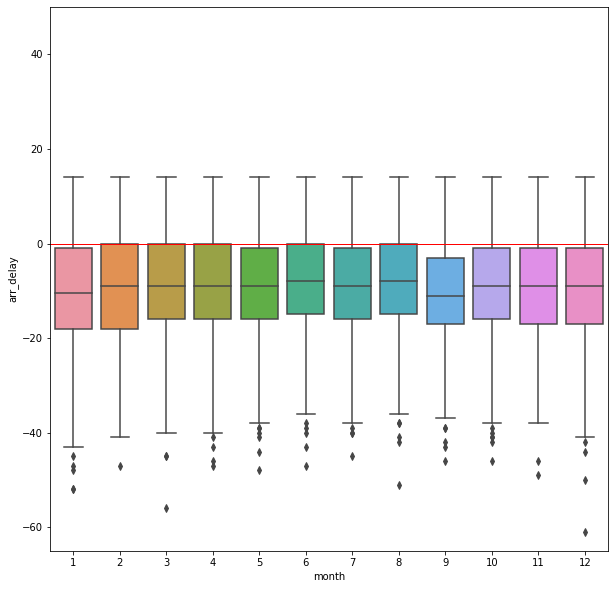

In [50]:
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x="month", y="arr_delay", data=df_delay_airport)
fig.axis(ymin=-65, ymax=50)
plt.xticks(rotation=0);
plt.axhline(linewidth=1, color='r', y=0)

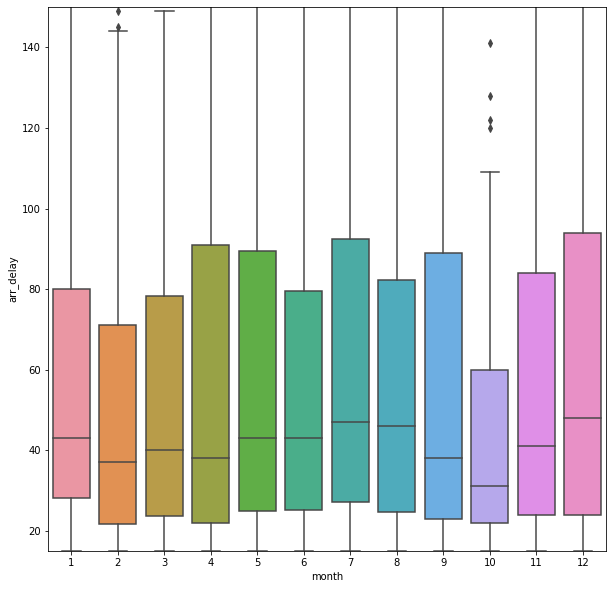

In [51]:
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x="month", y="arr_delay", data=df_delay_dep)
fig.axis(ymin=15, ymax=150)
plt.xticks(rotation=0);
plt.axhline(linewidth=1, color='r', y=0)

In [59]:
#import the dataset from pycaret repository
from pycaret.datasets import get_data
dset = df_delay_dep
#import regression module
from pycaret.regression import *
#intialize the setup
exp_reg = setup(dset, target = 'arr_delay')

,Description,Value
0,session_id,6086
1,Target,arr_delay
2,Original Data,"(1873, 15)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1311, 195)"


In [60]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0001,0.0000,0.0003,1.0000,0.0000,0.0000,0.1750
ridge,Ridge Regression,0.0002,0.0000,0.0004,1.0000,0.0000,0.0000,0.0070
omp,Orthogonal Matching Pursuit,0.0003,0.0000,0.0007,1.0000,0.0000,0.0000,0.0040
br,Bayesian Ridge,0.0023,0.0000,0.0040,1.0000,0.0001,0.0000,0.0300
huber,Huber Regressor,0.0843,0.1060,0.2386,1.0000,0.0058,0.0018,0.0460
lasso,Lasso Regression,0.0648,0.3388,0.3734,0.9999,0.0124,0.0018,0.0120
en,Elastic Net,0.0666,0.3477,0.3715,0.9999,0.0132,0.0019,0.0100
et,Extra Trees Regressor,0.8880,130.6813,6.3237,0.9925,0.0111,0.0029,0.0900
gbr,Gradient Boosting Regressor,1.0734,128.7101,6.2812,0.9920,0.0138,0.0077,0.0510
rf,Random Forest Regressor,0.9714,195.4784,7.4135,0.9880,0.0104,0.0020,0.0750


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1856.06201171875, tolerance: 881.1076049804688
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2042.6517333984375, tolerance: 968.1031494140625
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1724.4129638671875, tolerance: 877.506591796875
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/li

Conclusion: if the arrival delay is not a sum of of other delays - then the delay is close to 0, with median below zero (table 1)
If one of the airport delays is in place, then arrival delay=sum of airport delays AND the arrival delay is significant

In [52]:
#df3 = df2.dropna()
#df3
df3_nzero_diff_delays1=df3_nzero_diff_delays[(df3_nzero_diff_delays.checking_diff_delays_arr!=0)]
df3_nzero_diff_delays

NameError: name 'df3_nzero_diff_delays' is not defined

In [343]:
1873+8127


10000

In [308]:
10000-8986

1014

In [ ]:
#df_gr=df1.groupby(df1['fl_date'].map(lambda x: x.month))
#df_gr.describe()
#df1['date'] = df1['date'].astype("datetime64")
delay_cols = [col for col in df1.columns if 'delay' in col]
#print(list(df1.columns))
delay_cols=['fl_date']+['month']+['year']+delay_cols
#print(delay_cols)
df_delay=df1[delay_cols]
df_delay